### 정밀도 & 재현율

In [1]:
# 재현율 : Positive 인데 Negative로 예측하면 안되는 경우
# 1 인데 0으로 예측하면 안되는 경우
# FN을 낮춰야함
# ex) 암환자 분류

In [2]:
# 정밀도 : Negative를 Positive로 예측하면 안되는 경우
# ex) 스팸메일 분류

In [ ]:
# 정밀도와 재현율의 반비례 : Traced-Off

### 정형 데이터의 증강

In [22]:
# 같은 데이터를 가지고 나누어 교차 검증
# K-Fold
# sklearn에서는 cross validation 사용

In [3]:
import sklearn

print(sklearn.__version__)

1.2.2


In [23]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred
    
# pred : x데이터만큼 0으로 세팅 [[0.][0.]..[0.]]
# 성별이 0이면 0으로 예측
# 성별이 1이면 1으로 예측

In [5]:

from sklearn.preprocessing import LabelEncoder 

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('..//06_08//titanic//train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
# myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [45]:
import time

start = time.time()

X = X_test.copy()
pred = []

for i in X['Sex']:
    if i ==1:
        pred.append(0)
    else:
        pred.append(1)
pd.DataFrame({'성별':X['Sex'],'pred':pred})

time.time()- start

0.0009992122650146484

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [46]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [47]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [49]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
# fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


c:\Users\user\miniconda3\envs\py\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LogisticRegression 활용

In [36]:
# 라이브러리 우클릭 - 'Go to define' - 상속 확인 가능
# baseEstimator 상속함
from sklearn.linear_model import LogisticRegression
# Sparse Matrix : 희소행렬, 0이 많은 행렬

model = LogisticRegression()
# 어떤 모델 썼는지 나옴, 하이퍼 파라미터 하나도 사용하지 않음
model.get_params

<bound method BaseEstimator.get_params of LogisticRegression()>

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='libinear')
# 모델,하이퍼 파라미터 확인 가능
model.get_params , model.__class__ 

(<bound method BaseEstimator.get_params of LogisticRegression(solver='libinear')>,
 sklearn.linear_model._logistic.LogisticRegression)

In [29]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [53]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('../06_08/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

# LogisticRegression 고전적 분류
# liblinear 가 성능이 좋은 경향이 있다.
# LogisticRegression 은 공식이 딱1개임
# XGBoost는 공식을 변환해감 (인공지능과 유사)


lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
# get_clf_eval(y_test , pred)

In [54]:
lr_clf.predict_proba(X_test)

array([[0.44935228, 0.55064772],
       [0.86335513, 0.13664487],
       [0.86429645, 0.13570355],
       [0.84968519, 0.15031481],
       [0.82343411, 0.17656589],
       [0.84231224, 0.15768776],
       [0.87095491, 0.12904509],
       [0.27228604, 0.72771396],
       [0.78185129, 0.21814871],
       [0.33185992, 0.66814008],
       [0.86178764, 0.13821236],
       [0.870581  , 0.129419  ],
       [0.86425952, 0.13574048],
       [0.87065946, 0.12934054],
       [0.56033547, 0.43966453],
       [0.85003024, 0.14996976],
       [0.88954174, 0.11045826],
       [0.74250732, 0.25749268],
       [0.71120225, 0.28879775],
       [0.23776272, 0.76223728],
       [0.75684106, 0.24315894],
       [0.62428169, 0.37571831],
       [0.84655248, 0.15344752],
       [0.82711259, 0.17288741],
       [0.8682563 , 0.1317437 ],
       [0.77003828, 0.22996172],
       [0.82946349, 0.17053651],
       [0.9033613 , 0.0966387 ],
       [0.73372048, 0.26627952],
       [0.68847388, 0.31152612],
       [0.

In [55]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [67]:
pd.DataFrame({'실제값 ':y_test,'예측값':pred})

,실제값,예측값
431,1,1
821,1,0
629,0,0
626,0,0
665,0,0
...,...,...
638,0,0
771,0,0
521,0,0
711,0,0


In [70]:
confusion_list = []
for 실제,예측 in zip(y_test,pred):
    if 실제 == 1 and  예측 == 1:
        confusion_list.append('TP')
    elif 실제 == 0 and  예측 == 0:
        confusion_list.append('TN')
    elif 실제 == 1 and  예측 == 0:
        confusion_list.append('FN')
    elif 실제 == 0 and  예측 == 1:
        confusion_list.append('FP')
confusion_list

['TP',
 'FN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TP',
 'TN',
 'TP',
 'FN',
 'TN',
 'TN',
 'FP',
 'TN',
 'FN',
 'TN',
 'TN',
 'TP',
 'TP',
 'FP',
 'TP',
 'TP',
 'FN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'FN',
 'TN',
 'FN',
 'TN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TN',
 'FN',
 'TN',
 'TP',
 'FN',
 'TP',
 'TP',
 'TP',
 'TN',
 'TP',
 'TP',
 'TN',
 'FN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TP',
 'FP',
 'TN',
 'TP',
 'TN',
 'FP',
 'FN',
 'TN',
 'TN',
 'TN',
 'FN',
 'TN',
 'TN',
 'FN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TN',
 'TP',
 'TN',
 'TP',
 'FN',
 'TP',
 'FP',
 'FP',
 'TN',
 'TP',
 'TN',
 'TN',
 'TP',
 'FP',
 'TN',
 'TN',

In [73]:
np.unique(confusion_list,return_counts=True)

(array(['FN', 'FP', 'TN', 'TP'], dtype='<U2'),
 array([ 14,  10, 108,  47], dtype=int64))

In [72]:
# 정확도
accuray = sum([1 for x in confusion_list if x == "TN" or x == "TP" ])/len(confusion_list)
# 정밀도
precison = sum([1 for x in confusion_list if  x == "TP" ])/ sum([1 for x in confusion_list if  x == "TP" or x == "FP" ])
# 재현율
recall = sum([1 for x in confusion_list if  x == "TP" ])/ sum([1 for x in confusion_list if  x == "TP" or x == "FN" ])
accuray, precison, recall

(0.8659217877094972, 0.8245614035087719, 0.7704918032786885)

In [42]:
# 혼동 행렬 리포트

In [82]:
from sklearn.metrics import classification_report

report1 = classification_report(y_test,pred)
report2 = report1.split("\n")

In [83]:
report2

['              precision    recall  f1-score   support',
 '',
 '           0       0.89      0.92      0.90       118',
 '           1       0.82      0.77      0.80        61',
 '',
 '    accuracy                           0.87       179',
 '   macro avg       0.85      0.84      0.85       179',
 'weighted avg       0.86      0.87      0.86       179',
 '']

<Axes: >

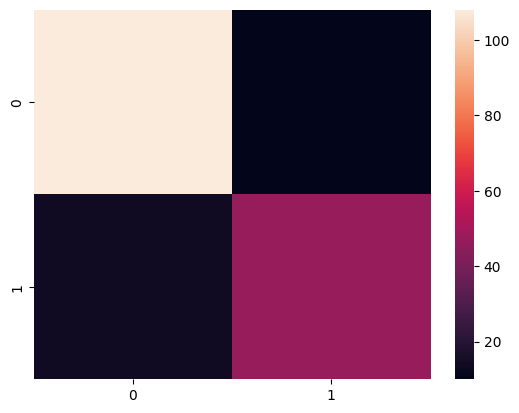

In [87]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,pred))

<Axes: >

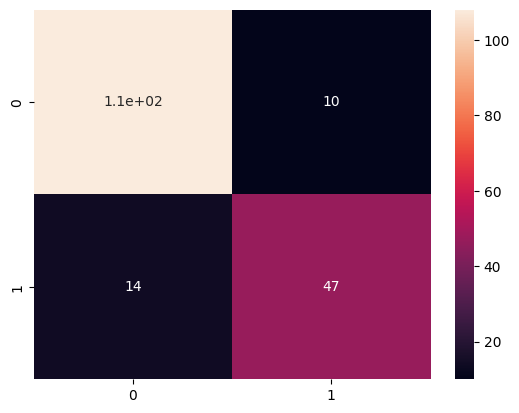

In [88]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

<Axes: >

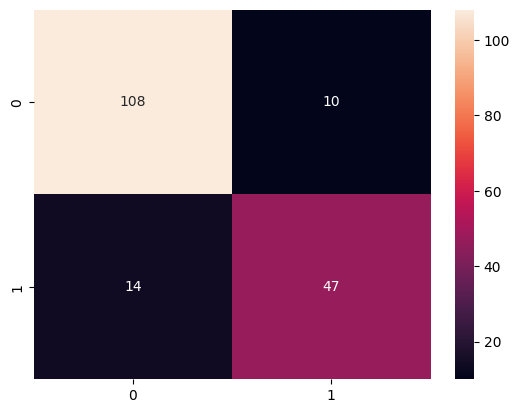

In [89]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [66]:
get_clf_eval(y_test , pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [92]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [93]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [94]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [97]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('-------임곗값:',custom_threshold)
        # get_clf_eval(y_test , custom_predict)
        report = classification_report(y_test,custom_predict)
        print(report)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

-------임곗값: 0.4
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       118
           1       0.70      0.82      0.76        61

    accuracy                           0.82       179
   macro avg       0.80      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179

-------임곗값: 0.45
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       118
           1       0.79      0.79      0.79        61

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

-------임곗값: 0.5
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.82      0.77      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86  